In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from src.utils import data
from src.utils import ucr_2018
import seaborn as sns
mpl.rcParams.update({"figure.facecolor": "white"})

In [3]:
# train_df, test_df = ucr_2018.get_dataset("")
# X_train, y_train = data.x_y_split(train_df, y_col=0)
# X_test, y_test = data.x_y_split(test_df, y_col=0)

In [100]:
import json

anomalies_path = "data/NAB/labels/combined_labels.json"
with open(anomalies_path) as json_file:
    anomalies = json.load(json_file)

ds_name = "realAWSCloudwatch/ec2_cpu_utilization_"
ds_anomalies = {
    k[len(ds_name):-4]: v # only file name, no csv extension
    for k, v in anomalies.items()
    if ds_name in k[:len(ds_name)]
}
ds_files = list(ds_anomalies.keys())
ds_files

['24ae8d',
 '53ea38',
 '5f5533',
 '77c1ca',
 '825cc2',
 'ac20cd',
 'c6585a',
 'fe7f93']

In [101]:
ds_anomalies

{'24ae8d': ['2014-02-26 22:05:00', '2014-02-27 17:15:00'],
 '53ea38': ['2014-02-19 19:10:00', '2014-02-23 20:05:00'],
 '5f5533': ['2014-02-19 00:22:00', '2014-02-24 18:37:00'],
 '77c1ca': ['2014-04-09 10:15:00'],
 '825cc2': ['2014-04-15 15:44:00', '2014-04-16 03:34:00'],
 'ac20cd': ['2014-04-15 00:49:00'],
 'c6585a': [],
 'fe7f93': ['2014-02-17 06:12:00',
  '2014-02-22 00:02:00',
  '2014-02-23 15:17:00']}

In [102]:
df.iloc[0, 0]

Timestamp('2014-02-14 14:27:00')

In [103]:
import time
import datetime

for key in ds_anomalies:
    ds_anomalies[key] = [
        pd.Timestamp(anomaly)#datetime.datetime.strptime(anomaly, "%Y-%m-%d %H:%M:%S").timestamp()
        for anomaly in ds_anomalies[key]
    ]
ds_anomalies

{'24ae8d': [Timestamp('2014-02-26 22:05:00'),
  Timestamp('2014-02-27 17:15:00')],
 '53ea38': [Timestamp('2014-02-19 19:10:00'),
  Timestamp('2014-02-23 20:05:00')],
 '5f5533': [Timestamp('2014-02-19 00:22:00'),
  Timestamp('2014-02-24 18:37:00')],
 '77c1ca': [Timestamp('2014-04-09 10:15:00')],
 '825cc2': [Timestamp('2014-04-15 15:44:00'),
  Timestamp('2014-04-16 03:34:00')],
 'ac20cd': [Timestamp('2014-04-15 00:49:00')],
 'c6585a': [],
 'fe7f93': [Timestamp('2014-02-17 06:12:00'),
  Timestamp('2014-02-22 00:02:00'),
  Timestamp('2014-02-23 15:17:00')]}

In [114]:
df.loc[ds_anomalies["24ae8d"]]

,value
timestamp,
2014-02-26 22:05:00,2.344
2014-02-27 17:15:00,0.602


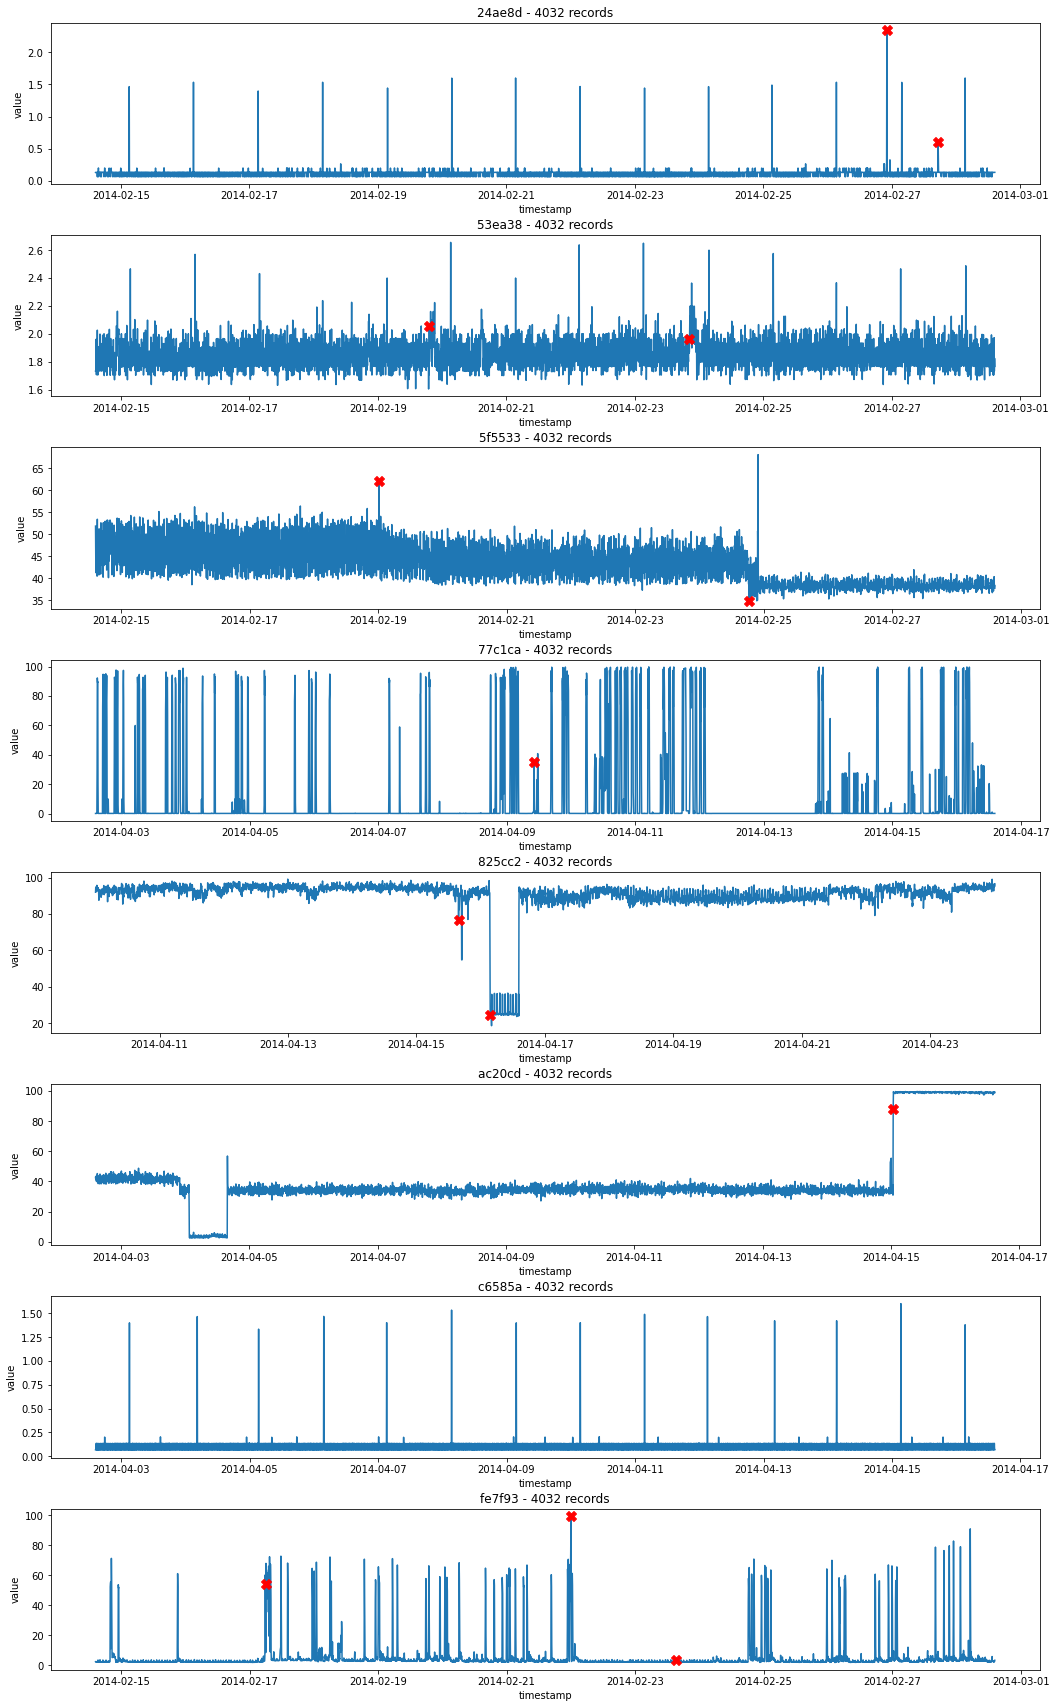

In [121]:
data_path = "data/NAB/data/"
fig, axes = plt.subplots(len(ds_files), figsize=(15, len(ds_files)*3))
fig.tight_layout(pad=3.0)

datasets = {}
for i, file_name in enumerate(ds_files):
    df = pd.read_csv(data_path + ds_name + file_name + ".csv")
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.set_index('timestamp')
    axes[i].set_title("%s - %d records" % (file_name, df.shape[0]))
    if len(ds_anomalies[file_name]) > 0:
        axes[i].scatter(
            ds_anomalies[file_name],
            df.loc[ds_anomalies[file_name]],
            c="red",
            marker="X",
            s=100,
            zorder=10)
    sns.lineplot(data=df, x="timestamp", y="value", ax=axes[i]);
    datasets[file_name] = df

In [16]:
from scipy.stats import multivariate_normal
mv = multivariate_normal(0, 1, allow_singular=True)
tmp = mv.pdf([0, 1, 2, 3]) < 0.05
tmp.astype(int)

array([0, 0, 0, 1])